<a href="https://colab.research.google.com/github/rakib89-ftj/ml--models/blob/master/Customer_Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/Customer_Segmentation_py.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26/11/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26/11/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23/03/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23/03/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15/05/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
df.isnull().sum()

,0
Date,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0


# **What is the distribution of customers across different age groups (Age_Group)?**

In [6]:
df['Age_Group'].value_counts()

,count
Age_Group,
Adults (35-64),55824
Young Adults (25-34),38654
Youth (<25),17828
Seniors (64+),730


# **How does Customer_Gender vary across different countries or states?**

In [7]:
gender_distribution = df.groupby(['Country', 'State', 'Customer_Gender'])['Customer_Gender'].count().unstack().fillna(0)
gender_distribution

Customer_Gender                           F        M
Country        State                                
Australia      New South Wales       5230.0   5182.0
               Queensland            2568.0   2652.0
               South Australia        772.0    792.0
               Tasmania               286.0    438.0
               Victoria              2650.0   3366.0
Canada         Alberta                 34.0     22.0
               British Columbia      6456.0   7660.0
               Ontario                  6.0      0.0
France         Charente-Maritime       52.0     96.0
               Essonne                574.0    420.0
               Garonne (Haute)        118.0     90.0
               Hauts de Seine         484.0    600.0
               Loir et Cher            46.0     74.0
               Loiret                 176.0    206.0
               Moselle                206.0    180.0
               Nord                   874.0    796.0
               Pas de Calais           24.0     66.0
               Seine (Paris)         1098.0   1230.0
               Seine Saint Denis      862.0    822.0
               Seine et Marne         212.0    182.0
               Somme                   76.0     58.0
               Val d'Oise             192.0     72.0
               Val de Marne            68.0     90.0
               Yveline                442.0    512.0
Germany        Bayern                 724.0    702.0
               Brandenburg             90.0    108.0
               Hamburg                974.0    862.0
               Hessen                1222.0   1162.0
               Nordrhein-Westfalen   1188.0   1296.0
               Saarland              1374.0   1396.0
United Kingdom England               6712.0   6908.0
United States  Alabama                  4.0      0.0
               Arizona                  2.0      2.0
               California           10820.0  11630.0
               Florida                 10.0      4.0
               Georgia                  6.0      2.0
               Illinois                 8.0     20.0
               Kentucky                 0.0     10.0
               Massachusetts            2.0      0.0
               Minnesota                0.0      6.0
               Mississippi              4.0      0.0
               Missouri                 6.0      0.0
               Montana                  6.0      0.0
               New York                14.0      6.0
               North Carolina           4.0      0.0
               Ohio                     0.0     28.0
               Oregon                2570.0   2716.0
               South Carolina          10.0      0.0
               Texas                   26.0      4.0
               Utah                     0.0     10.0
               Virginia                 0.0      4.0
               Washington            5440.0   5824.0
               Wyoming                  2.0      6.0

# **What is the most popular Product_Category and Sub_Category in terms of Order_Quantity?**

In [8]:
popular_cat=df.groupby('Product_Category')['Order_Quantity'].sum().sort_values(ascending=False)
popular_cat

,Order_Quantity
Product_Category,
Accessories,1054162
Clothing,254743
Bikes,36411


In [9]:
popular_sub_cat=df.groupby('Sub_Category')['Order_Quantity'].sum().sort_values(ascending=False)
popular_sub_cat

,Order_Quantity
Sub_Category,
Tires and Tubes,514051
Bottles and Cages,241726
Helmets,181606
Jerseys,88125
Caps,67268
Fenders,62138
Gloves,39978
Cleaners,27574
Shorts,27168


# **Can we segment customers based on their purchasing behavior (e.g., Order_Quantity, Profit, Revenue)? Use clustering techniques such as K-Means or Hierarchical Clustering**

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
X=df[['Order_Quantity', 'Profit', 'Revenue']]
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)
kmeans= KMeans(n_clusters=10, random_state=42)
df['Segment']=kmeans.fit_predict(X_scaled)

In [19]:
segment_analysis= df.groupby('Segment')[['Order_Quantity', 'Profit', 'Revenue']].mean()
segment_analysis

,Order_Quantity,Profit,Revenue
Segment,,,
0,3.397681,50.866699,132.909396
1,2.150313,1435.010329,4278.089426
2,18.200551,117.887248,255.200256
3,1.617470,383.449493,1267.960369
4,24.796425,490.578419,893.534933
5,2.743478,2500.184783,7141.478986
6,1.298930,818.015878,2382.552431
7,10.914878,95.283462,192.513139
8,3.721154,4190.663462,11362.850962


# **characteristics of each customer cluster**

In [22]:
n_clusters=int(input('Enter the number of Clusters: '))

kmeans_1=KMeans(n_clusters=n_clusters, random_state=42)
df['Segment_1']=kmeans_1.fit_predict(X_scaled)

char= df.groupby('Segment_1').agg(
    {
        'Order_Quantity': 'mean',
        'Profit': 'mean',
        'Revenue': 'mean',
        'Age_Group': lambda x:x.mode()[0],
        'Customer_Gender': lambda x:x.mode()[0],
        'Country': lambda x:x.mode()[0],
        'State': lambda x:x.mode()[0],
        'Product_Category': lambda x:x.mode()[0],
        'Sub_Category': lambda x:x.mode()[0]
    }
)
char

Enter the number of Clusters: 3


,Order_Quantity,Profit,Revenue,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category
Segment_1,,,,,,,,,
0,5.393397,136.972651,393.357743,Adults (35-64),M,United States,California,Accessories,Tires and Tubes
1,1.754297,1253.292992,3627.971844,Adults (35-64),F,United States,California,Bikes,Road Bikes
2,21.844333,187.131993,376.958203,Adults (35-64),M,United States,California,Accessories,Tires and Tubes


# **Which Product_Category or Sub_Category generates the highest Profit and Revenue?**

In [23]:
category_profit= df.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)
category_profit

,Profit
Product_Category,
Bikes,20519276
Accessories,8862377
Clothing,2839447


In [24]:
category_rev= df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
category_rev

,Revenue
Product_Category,
Bikes,61782134
Accessories,15117992
Clothing,8370882


In [25]:
sub_cat_profit= df.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False)
sub_cat_profit

,Profit
Sub_Category,
Road Bikes,10078875
Mountain Bikes,8160463
Helmets,3380203
Tires and Tubes,2727713
Touring Bikes,2279938
Shorts,1034342
Bottles and Cages,810598
Fenders,748914
Jerseys,603568


In [26]:
sub_cat_rev= df.groupby('Sub_Category')['Revenue'].sum().sort_values(ascending=False)
sub_cat_rev

,Revenue
Sub_Category,
Road Bikes,33363061
Mountain Bikes,21123526
Touring Bikes,7295547
Helmets,5741081
Tires and Tubes,4670902
Jerseys,4113742
Shorts,1740710
Bottles and Cages,1409174
Fenders,1245733


# **Analyze the relationship between Unit_Cost Unit_Price, and Profit.**

In [30]:
df['Profit']= (df['Unit_Price']- df['Unit_Cost'])* df['Order_Quantity']

correlation= df[['Unit_Cost', 'Unit_Price', 'Profit']].corr()
correlation

,Unit_Cost,Unit_Price,Profit
Unit_Cost,1.000000,0.997894,0.788331
Unit_Price,0.997894,1.000000,0.795308
Profit,0.788331,0.795308,1.000000


In [31]:
category_profit= df.groupby('Product_Category')['Profit'].mean()
category_profit

,Profit
Product_Category,
Accessories,149.130505
Bikes,1075.565314
Clothing,219.915023


# **Which Age_Group contributes most to Revenue and Profit?**

In [33]:
age_group_contributes= df.groupby('Age_Group').agg({'Revenue': 'mean', 'Profit': 'mean'}).sort_values(by=['Revenue', 'Profit'], ascending=False)
age_group_contributes

,Revenue,Profit
Age_Group,,
Young Adults (25-34),793.077405,389.146065
Adults (35-64),762.828765,377.280471
Youth (<25),657.572302,328.316693
Seniors (64+),421.975342,232.634247


# **Howdoes customer spending (Revenue) differ between Customer_Gender groups?**

In [37]:
gender_revenue = df.groupby('Customer_Gender')['Revenue'].sum()
gender_revenue

,Revenue
Customer_Gender,
F,41935599
M,43335409


,count
Revenue,
41935599,1
43335409,1


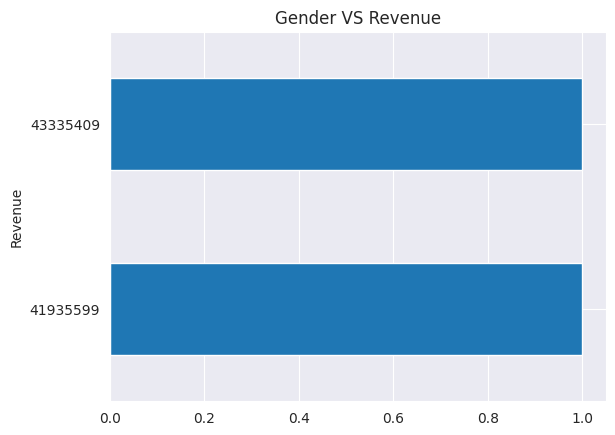

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

g_r=gender_revenue.value_counts()
sns.set_style('darkgrid')
g_r=g_r.sort_values(ascending=True)
g_r.plot(kind='barh', title='Gender VS Revenue')
pd.DataFrame(g_r.sort_values(ascending=False))

In [38]:
avg_spending = df.groupby('Customer_Gender')['Revenue'].mean()
avg_spending

,Revenue
Customer_Gender,
F,766.310924
M,743.164512


,count
Revenue,
766.310924,1
743.164512,1


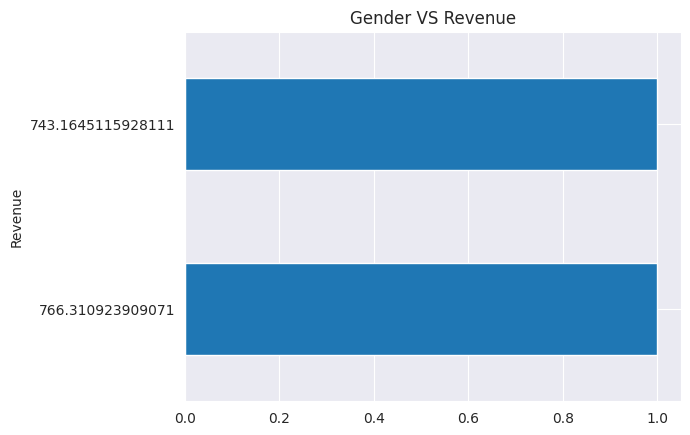

In [46]:
a_s=avg_spending.value_counts()
sns.set_style('darkgrid')
a_s=a_s.sort_values(ascending=True)
a_s.plot(kind='barh', title='Gender VS Revenue')
pd.DataFrame(a_s.sort_values(ascending=False))

# **Analyze the monthly or yearly trends in Revenue and Profit.**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

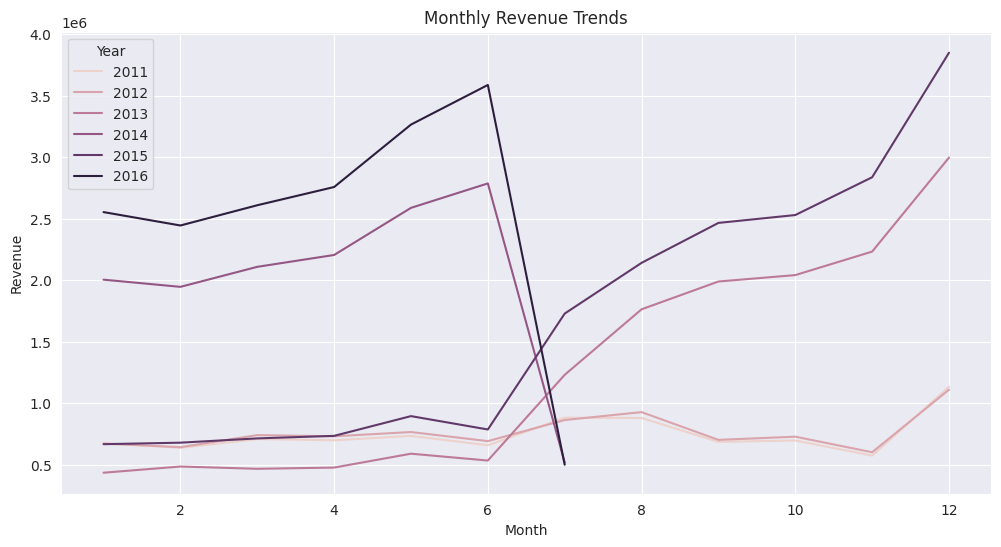

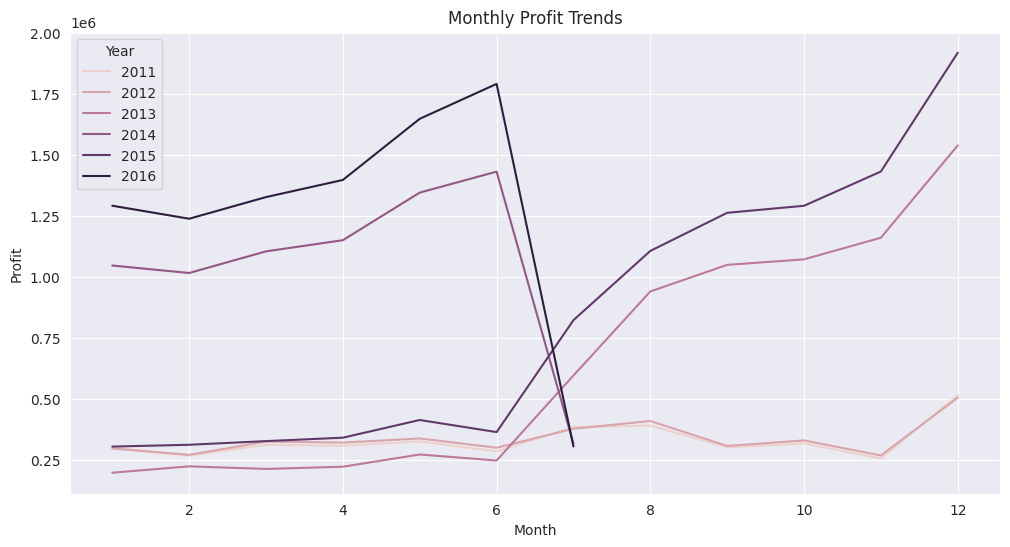

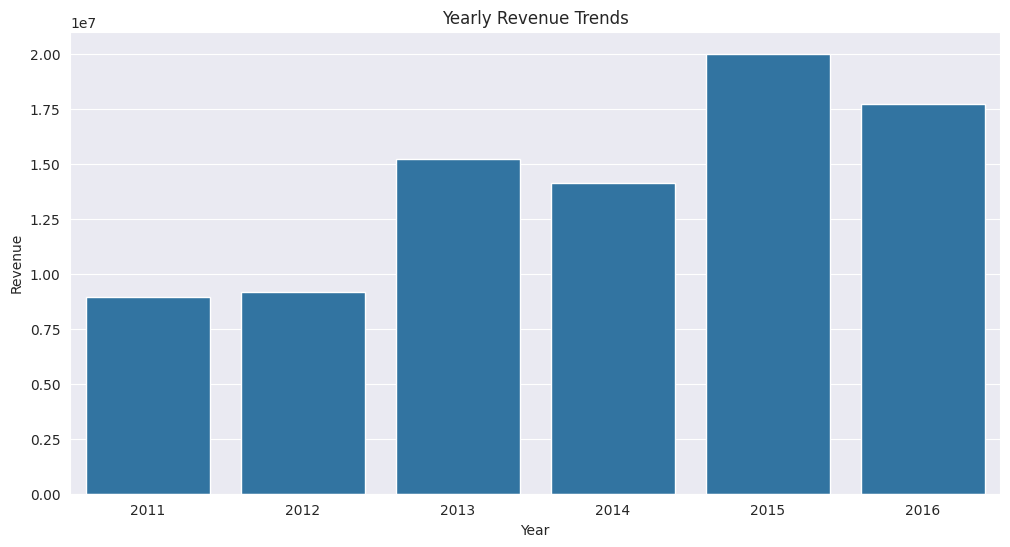

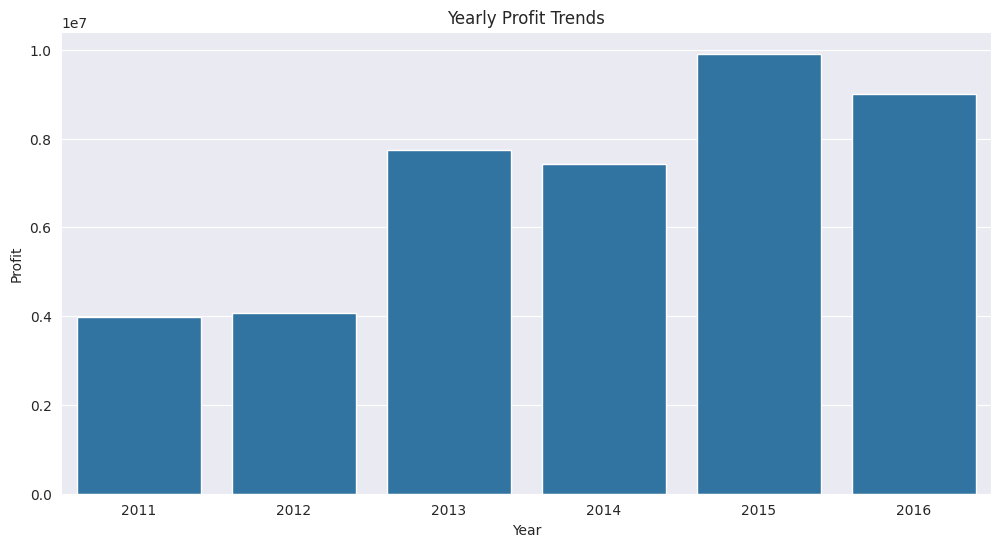

In [53]:
monthly_trends = df.groupby(['Year', 'Month'])[['Revenue', 'Profit']].sum().reset_index()
yearly_trends = df.groupby('Year')[['Revenue', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Revenue', hue='Year', data=monthly_trends)
plt.title('Monthly Revenue Trends')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Profit', hue='Year', data=monthly_trends)
plt.title('Monthly Profit Trends')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Revenue', data=yearly_trends)
plt.title('Yearly Revenue Trends')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Profit', data=yearly_trends)
plt.title('Yearly Profit Trends')
plt.show()

# **Predict the likelihood of high Order_Quantity based on customer demographics and product details using classification algorithms.**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [55]:
high_order_quan= df['Order_Quantity'].quantile(0.75)
df['High_Order_Quantity'] = (df['Order_Quantity']> high_order_quan).astype(int)

In [56]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'Segment', 'Segment_1',
       'High_Order_Quantity'],
      dtype='object')

In [57]:
X=pd.get_dummies(df[['Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Unit_Cost', 'Unit_Price']], columns=['Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category'])
y=df['High_Order_Quantity']

In [58]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

model= LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
y_pred= model.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.7635792639773531
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Create a regression model to predict Profit based on product and customer attributes.**

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
X=pd.get_dummies(df[['Age_Group', 'Customer_Gender', 'Country', 'State',
            'Product_Category', 'Sub_Category', 'Unit_Cost', 'Unit_Price',
            'Order_Quantity']], columns=['Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category'])
y=df['Profit']

In [64]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

model_1= LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred_1= model_1.predict(X_test)
mse= mean_squared_error(y_test, y_pred_1)
r2= r2_score(y_test, y_pred_1)

In [66]:
mse

113790.69471812707

In [67]:
r2

0.6863103643741193

# **Visualize the customer distribution by Country and State.**

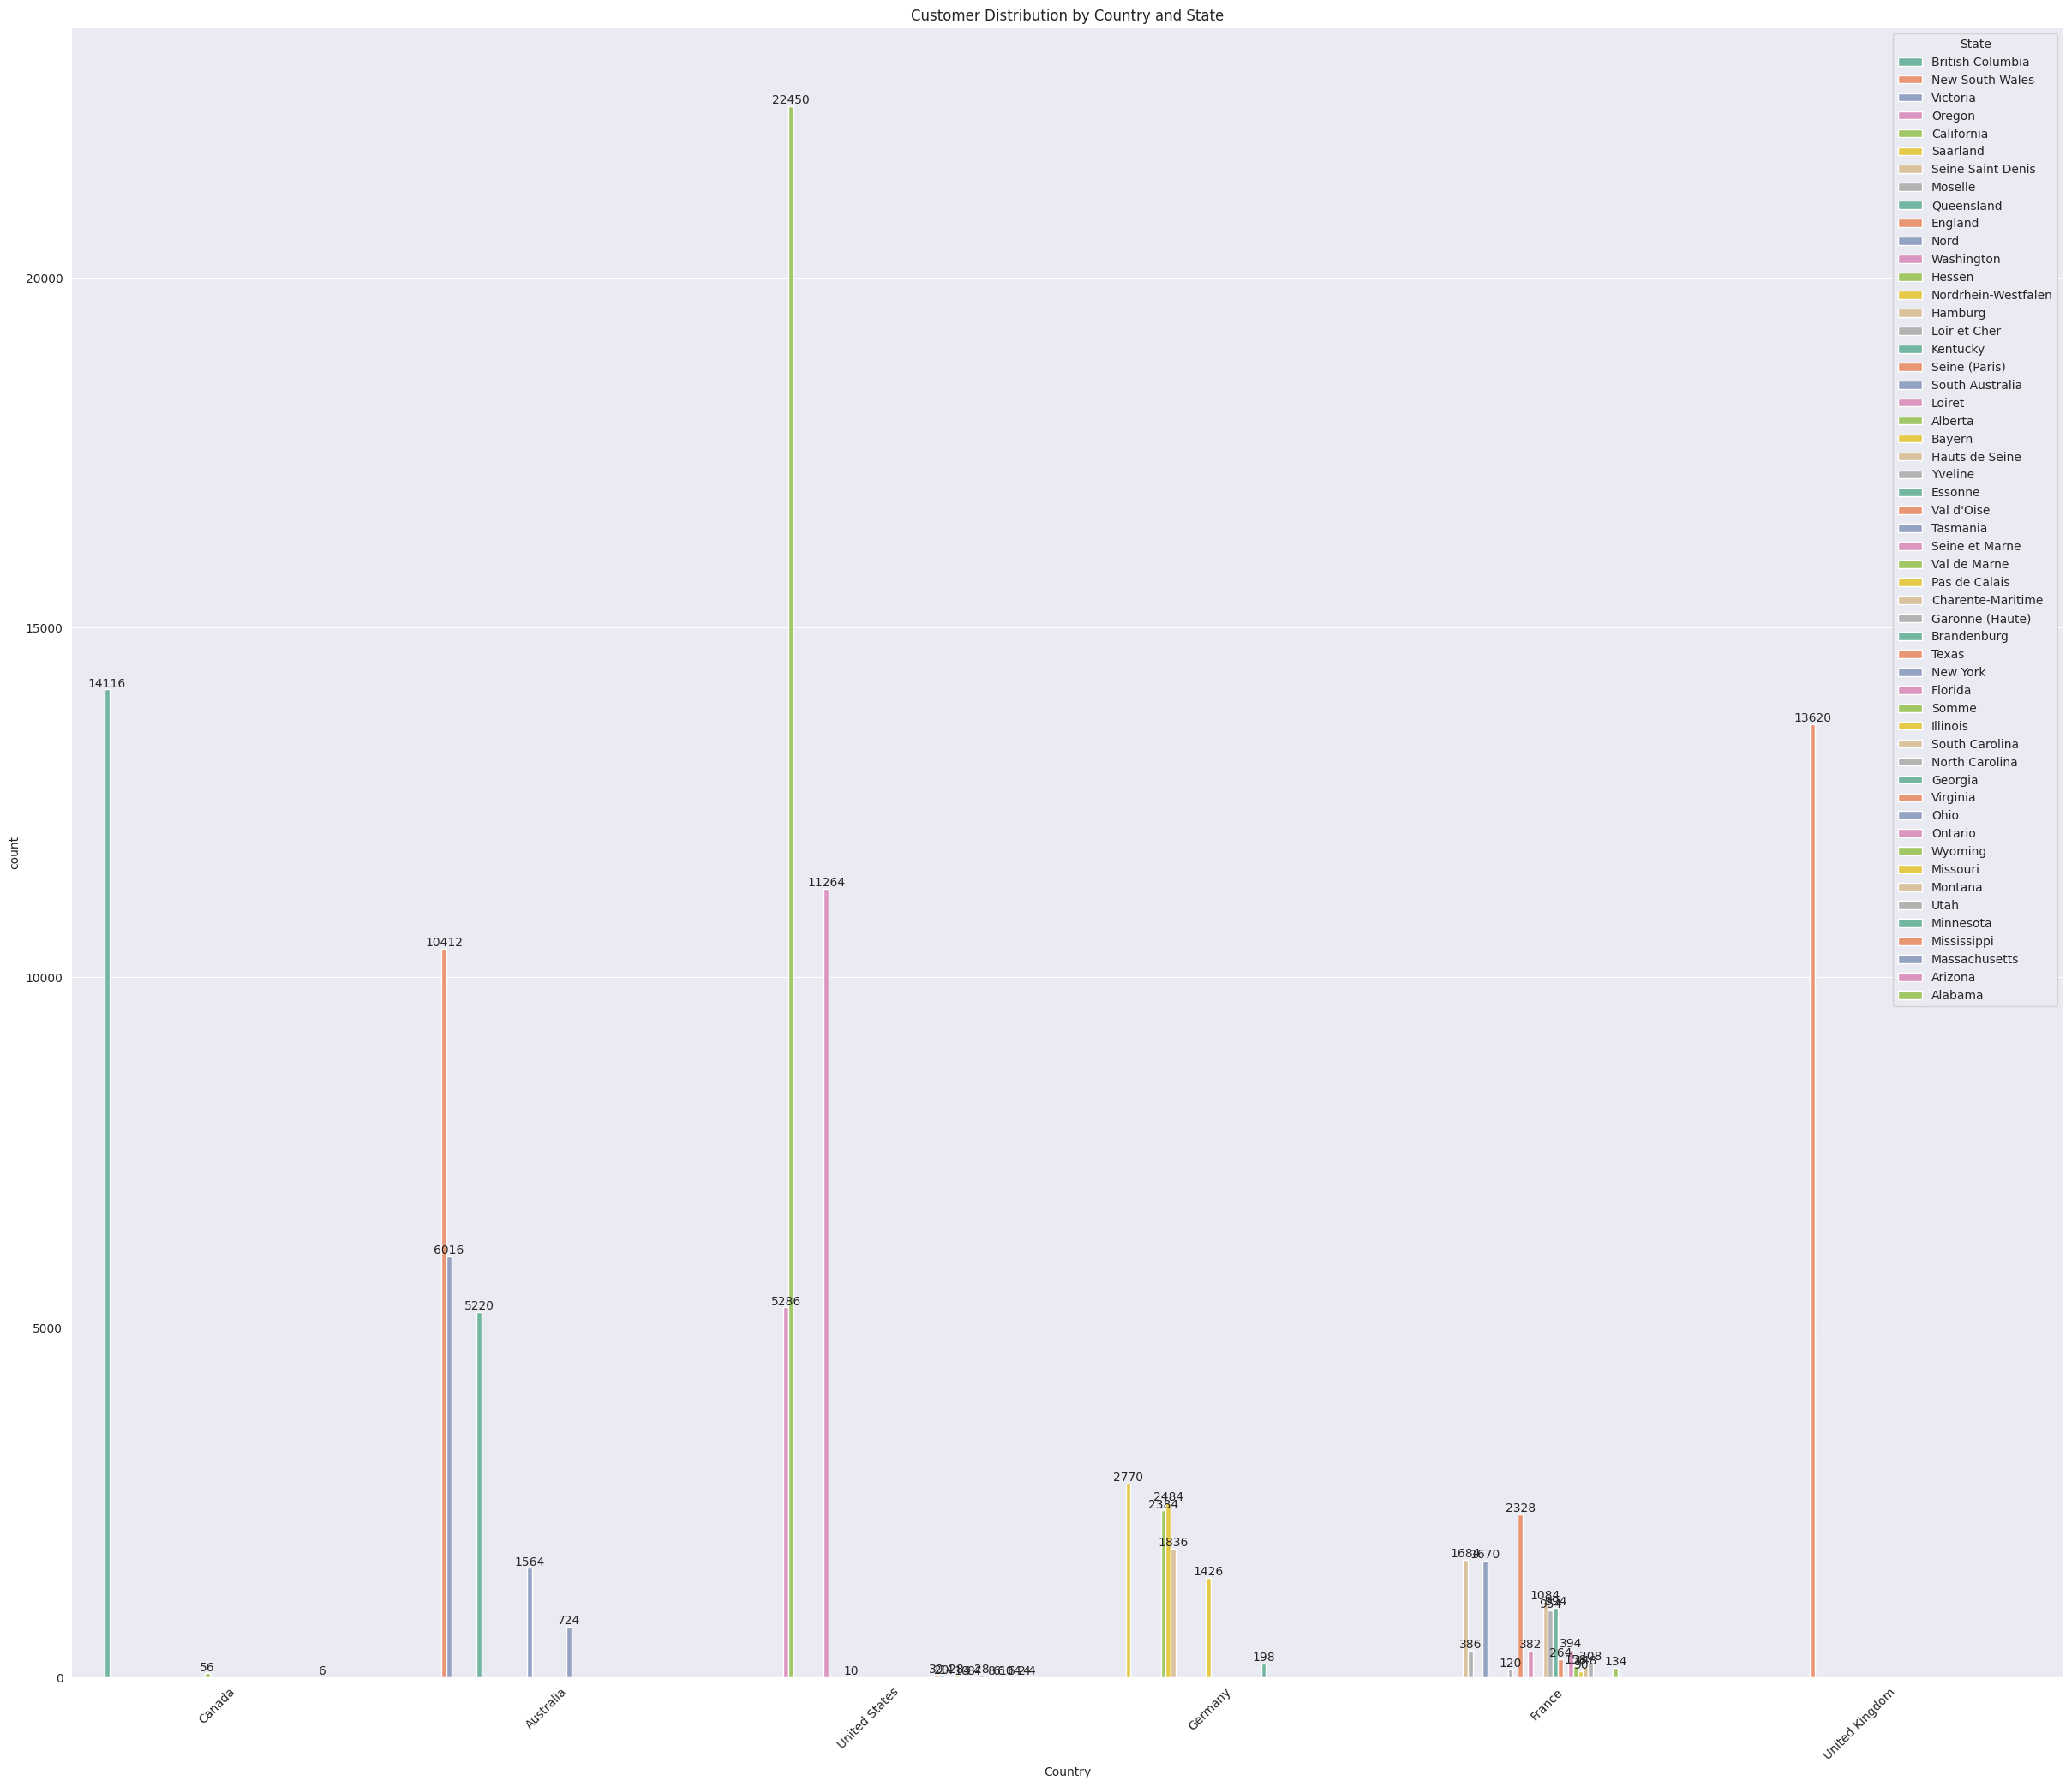

In [77]:

plt.figure(figsize=(30,25))
ax=sns.countplot(x='Country', hue='State', data=df, palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Customer Distribution by Country and State')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Create a bar chart showing Revenue or Profit for each Product_Category**

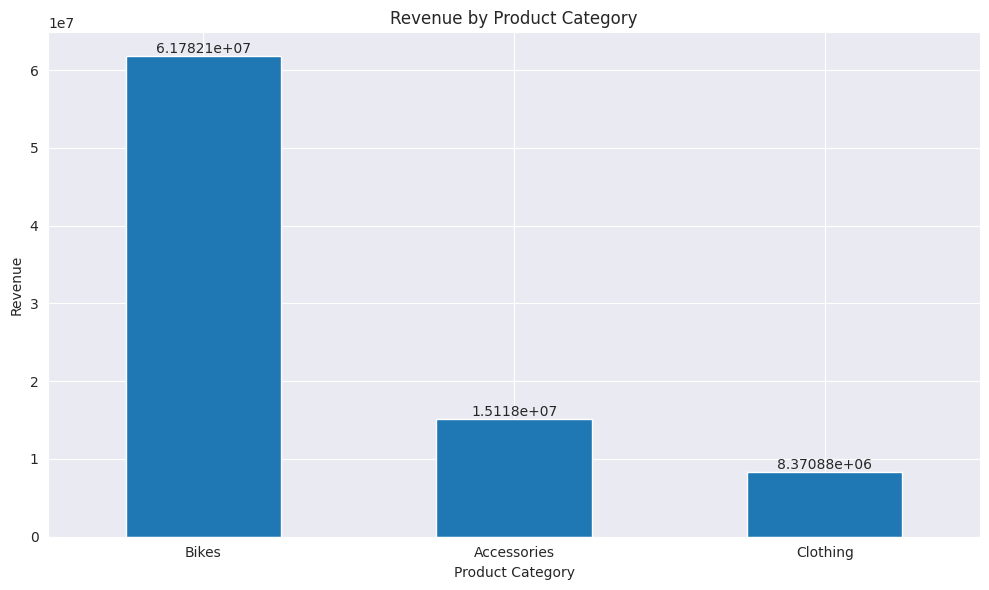

In [86]:
bx=category_rev.plot(kind='bar', figsize=(10, 6))
for bars in bx.containers:
    bx.bar_label(bars)
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Plot clusters of customers based on purchasing behavior for visual inspection**

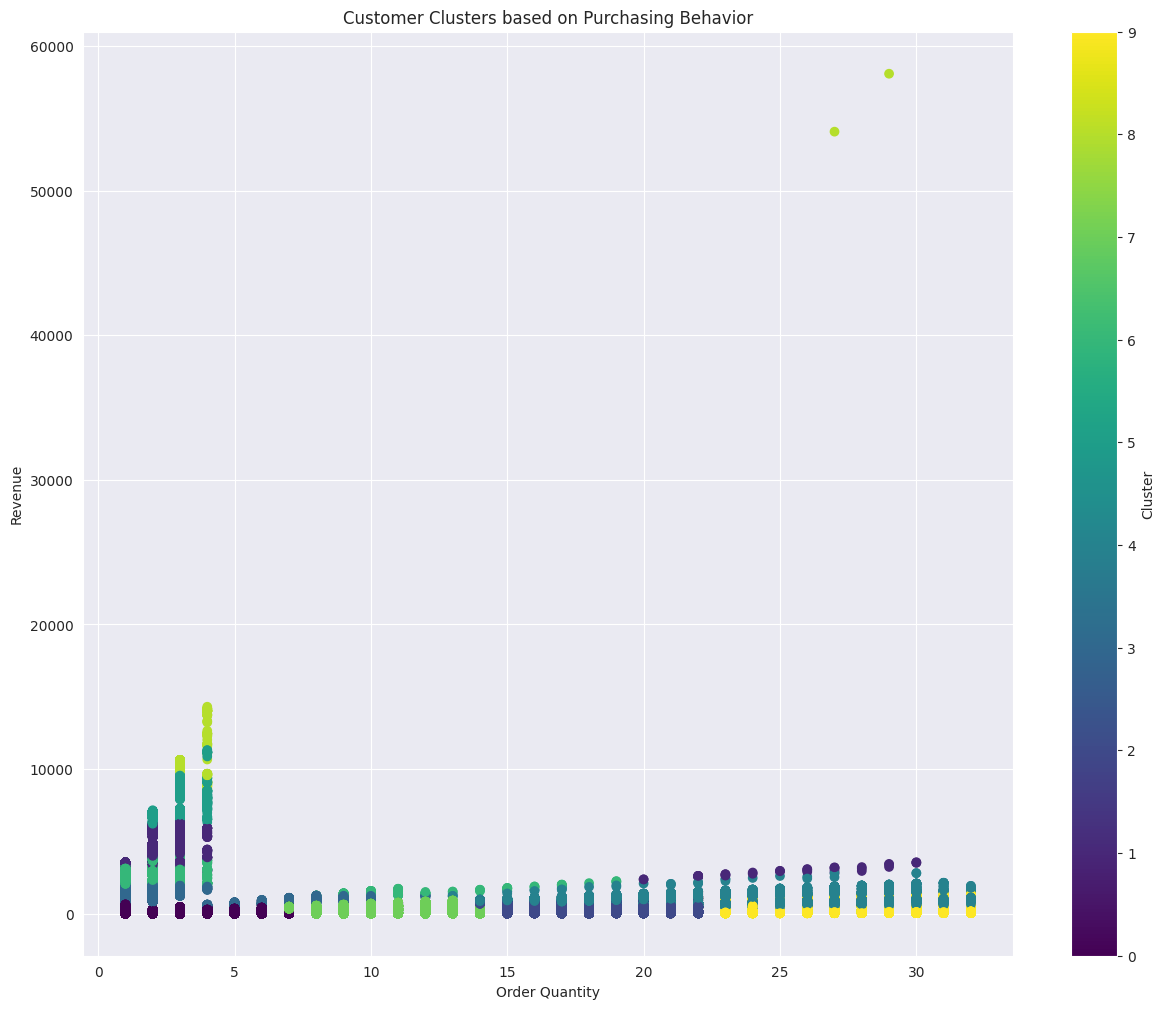

In [88]:
plt.figure(figsize=(15,12))
plt.scatter(df['Order_Quantity'], df['Revenue'], c=df['Segment'], cmap='viridis')
plt.xlabel('Order Quantity')
plt.ylabel('Revenue')
plt.title('Customer Clusters based on Purchasing Behavior')
plt.colorbar(label='Cluster')
plt.show()